In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cmocean
import numpy as np

In [34]:
#binned_neutral_density = pd.read_csv("../../derived_data/binned_neutral_density.csv", index_col = 0)
#binned_neutral_density.columns = binned_neutral_density.columns.astype("float") #convert column names from strings to floats
# binned_thorpe_eps = pd.read_csv("../../derived_data/binned_thorpe_dissipation.csv", index_col = 0)
# binned_thorpe_eps.columns = binned_thorpe_eps.columns.astype("float") #convert column names from strings to floats
# #binned_thorpe_eps

In [50]:
regions_key = {"air":-1, "shelf": 0, "open ocean": 1, "IL":2, "BL":3}
binned_regions = pd.read_csv("../../derived_data/gravity_current_regions.csv", index_col = 0)
binned_regions.columns = binned_regions.columns.astype("float")
binned_regions

,-53.5,-53.0,-52.5,-52.0,-51.5,-51.0,-50.5,-50.0,-49.5,-49.0,-48.5,-48.0,-47.5,-47.0
0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4996,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4997,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4998,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [51]:
binned_regions = binned_regions.iloc[0:600]

In [52]:
binned_finestructure_dissipation = pd.read_csv("../../derived_data/binned_finestructure_dissipation.csv", index_col = 0)
binned_finestructure_dissipation.columns = binned_finestructure_dissipation.columns.astype("float") #convert column names from strings to floats
binned_finestructure_dissipation

,-53.5,-53.0,-52.5,-52.0,-51.5,-51.0,-50.5,-50.0,-49.5,-49.0,-48.5,-48.0,-47.5,-47.0
62.0,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10,1.359135e-11
187.0,7.965103e-10,3.283406e-09,5.233763e-09,4.960701e-09,2.193591e-09,2.614172e-09,5.192939e-10,1.780772e-09,1.851746e-09,3.757822e-10,3.977511e-10,6.727422e-11,1.144524e-10,1.160336e-10
312.0,NaN,6.574537e-09,2.531349e-08,8.665921e-09,1.403223e-08,2.561817e-09,2.971783e-10,7.438957e-10,1.357557e-09,2.718102e-10,1.126462e-09,1.370712e-10,4.333585e-10,8.515302e-10
437.0,NaN,7.340639e-09,4.820197e-09,1.765682e-09,2.966885e-09,8.742657e-10,2.855886e-10,4.448810e-10,2.125415e-09,1.223184e-10,1.076213e-10,6.303895e-11,1.467980e-10,6.107825e-11
562.0,NaN,NaN,3.518181e-10,9.567619e-10,3.715320e-09,4.580561e-10,2.410084e-10,2.749154e-10,3.067187e-10,1.258181e-10,3.172554e-11,7.582789e-11,9.160456e-11,3.740574e-11
687.0,NaN,NaN,NaN,1.004293e-09,1.205745e-09,1.401286e-10,1.125506e-10,1.657022e-09,1.693173e-10,1.060552e-10,1.075313e-10,3.658712e-10,1.389623e-10,3.978076e-11
812.0,NaN,NaN,NaN,1.746722e-09,4.756469e-10,1.895544e-10,8.625258e-11,2.014742e-10,1.308777e-10,8.394655e-11,1.408937e-10,5.865811e-11,1.584224e-10,1.979035e-11
937.0,NaN,NaN,NaN,6.822171e-09,1.758239e-09,1.325279e-10,5.298657e-11,8.580288e-11,9.788567e-11,1.274525e-10,3.126898e-11,3.774693e-11,3.068772e-10,4.181449e-11
1062.0,NaN,NaN,NaN,1.275646e-08,5.488914e-10,1.915403e-10,1.079955e-10,1.020174e-10,2.235828e-10,5.694546e-11,7.499811e-11,2.372984e-11,1.178414e-10,4.618736e-11
1187.0,NaN,NaN,NaN,2.928122e-09,6.022726e-09,2.499868e-10,1.720492e-10,2.474127e-10,2.743348e-10,8.987654e-11,5.694680e-11,7.049973e-11,8.270553e-11,2.720829e-11


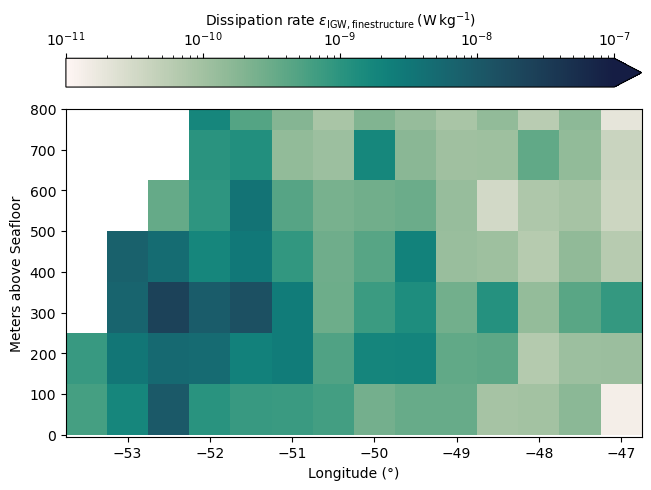

In [53]:
fig, ax = plt.subplots(1, layout = "constrained")
cmap = cmocean.cm.tempo
mpp = ax.pcolormesh(
    binned_finestructure_dissipation.columns, 
    binned_finestructure_dissipation.index, 
    binned_finestructure_dissipation,
    norm=mcolors.LogNorm(vmin=1e-11, vmax=1e-7),
    cmap=cmap,
)
ax.set_ylim(-5,800)
cb = plt.colorbar(mpp, ax=ax, location="top", extend = "max")
cb.set_label(r"Dissipation rate $\varepsilon_{\mathrm{IGW, finestructure}}\,$(W$\,$kg$^{-1}$)")
#draw_water_mass_boundaries(ax)
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Meters above Seafloor");

In [54]:
# interpolate bins to higher resolution
hires_finestructure = binned_finestructure_dissipation.iloc[:6].reindex(index = binned_regions.index, method = "nearest").iloc[0:600]

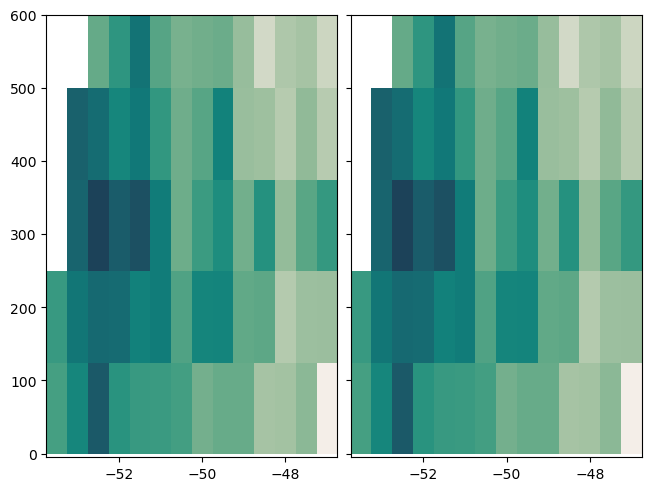

In [55]:
fig, ax = plt.subplots(ncols = 2, layout = "constrained", sharey = True, sharex = True)
cmap = cmocean.cm.tempo
mpp = ax[0].pcolormesh(
    binned_finestructure_dissipation.columns, 
    binned_finestructure_dissipation.index, 
    binned_finestructure_dissipation,
    norm=mcolors.LogNorm(vmin=1e-11, vmax=1e-7),
    cmap=cmap,
)
ax[0].set_ylim(-5,600)
#cb = plt.colorbar(mpp, ax=ax, location="top", extend = "max")
#cb.set_label(r"Dissipation rate $\varepsilon_{\mathrm{IGW, finestructure}}\,$(W$\,$kg$^{-1}$)")
#draw_water_mass_boundaries(ax)
#ax.set_xlabel("Longitude (°)")
#ax.set_ylabel("Meters above Seafloor");
mpp = ax[1].pcolormesh(
    hires_finestructure.columns, 
    hires_finestructure.index, 
    hires_finestructure,
    norm=mcolors.LogNorm(vmin=1e-11, vmax=1e-7),
    cmap=cmap,
)

In [56]:
hires_finestructure

,-53.5,-53.0,-52.5,-52.0,-51.5,-51.0,-50.5,-50.0,-49.5,-49.0,-48.5,-48.0,-47.5,-47.0
0,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10,1.359135e-11
1,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10,1.359135e-11
2,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10,1.359135e-11
3,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10,1.359135e-11
4,6.043735e-10,1.734269e-09,9.798453e-09,1.044405e-09,8.021675e-10,7.744046e-10,6.359012e-10,2.591982e-10,3.335413e-10,3.324426e-10,9.029678e-11,9.739017e-11,1.636815e-10,1.359135e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,NaN,NaN,3.518181e-10,9.567619e-10,3.715320e-09,4.580561e-10,2.410084e-10,2.749154e-10,3.067187e-10,1.258181e-10,3.172554e-11,7.582789e-11,9.160456e-11,3.740574e-11
596,NaN,NaN,3.518181e-10,9.567619e-10,3.715320e-09,4.580561e-10,2.410084e-10,2.749154e-10,3.067187e-10,1.258181e-10,3.172554e-11,7.582789e-11,9.160456e-11,3.740574e-11
597,NaN,NaN,3.518181e-10,9.567619e-10,3.715320e-09,4.580561e-10,2.410084e-10,2.749154e-10,3.067187e-10,1.258181e-10,3.172554e-11,7.582789e-11,9.160456e-11,3.740574e-11
598,NaN,NaN,3.518181e-10,9.567619e-10,3.715320e-09,4.580561e-10,2.410084e-10,2.749154e-10,3.067187e-10,1.258181e-10,3.172554e-11,7.582789e-11,9.160456e-11,3.740574e-11


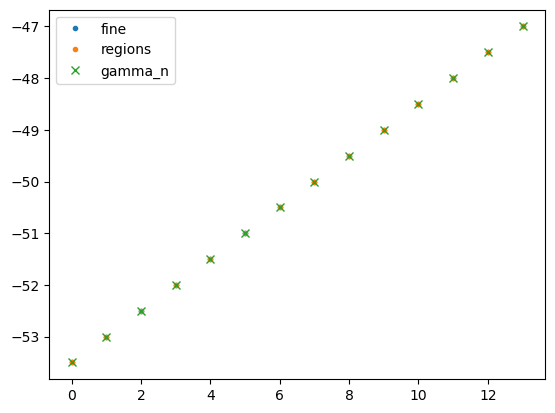

In [57]:
plt.plot(hires_finestructure.columns,".", label = "fine")
plt.plot(binned_regions.columns,".", label = "regions")
plt.plot(binned_neutral_density.columns,"x", label = "gamma_n")
plt.legend()

In [58]:
print(hires_finestructure.shape,binned_regions.shape)

(600, 14) (600, 14)


air nan
shelf 5.3e-09
open ocean 1.1e-09
IL 8.8e-10
BL 3.9e-10


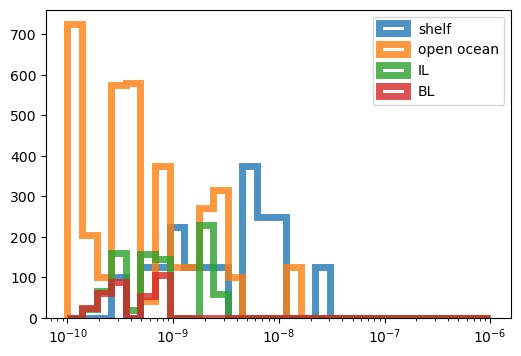

In [60]:
hires_finestructure
assert hires_finestructure.shape == binned_regions.shape
assert np.all(hires_finestructure.index == binned_regions.index)
logbins = np.logspace(-10, -6, 30)
fig, ax = plt.subplots(1, figsize = (6,4))
for name, number in regions_key.items():
    mean_eps = hires_finestructure[binned_regions == number].mean(axis = None)
    #std_eps = np.nanstd(binned_thorpe_eps[binned_regions == number].values)
    print(name, f"{mean_eps:.1e}") #+- {std_eps:.1e}")
    data = hires_finestructure[binned_regions == number].values.flatten()
    data = data[~np.isnan(data)]
    #print(data)
    if name == "air": continue
    #weights = np.ones_like(data)/float(len(data))
    ax.hist(data, bins = logbins, label = name, alpha = 0.8, histtype = "step", lw = 5)
plt.xscale('log')    
#plt.gca().set_ylim(0,500)  
plt.legend();